In [1]:
%matplotlib inline
from os.path import dirname, join
import numpy as np
import matplotlib.pyplot as plt
from nilearn.plotting import plot_stat_map

import nimare

/home/james/.conda/envs/nimare_dev/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/james/.conda/envs/nimare_dev/lib/python3.7/site-packages/duecredit-0.6.4-py3.7.egg/duecredit/utils.py:32: DeprecationWarning: dist() and linux_distribution() functions are deprecated in Python 3.5
  and platform.linux_distribution()[0] == 'debian' \
/home/james/.conda/envs/nimare_dev/lib/python3.7/site-packages/duecredit-0.6.4-py3.7.egg/duecredit/io.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import defaultdict, Iterator
/home/james/.conda/envs/nimare_dev/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/james/.conda/en

/home/james/.conda/envs/nimare_dev/lib/python3.7/site-packages/scipy-1.2.0-py3.7-linux-x86_64.egg/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


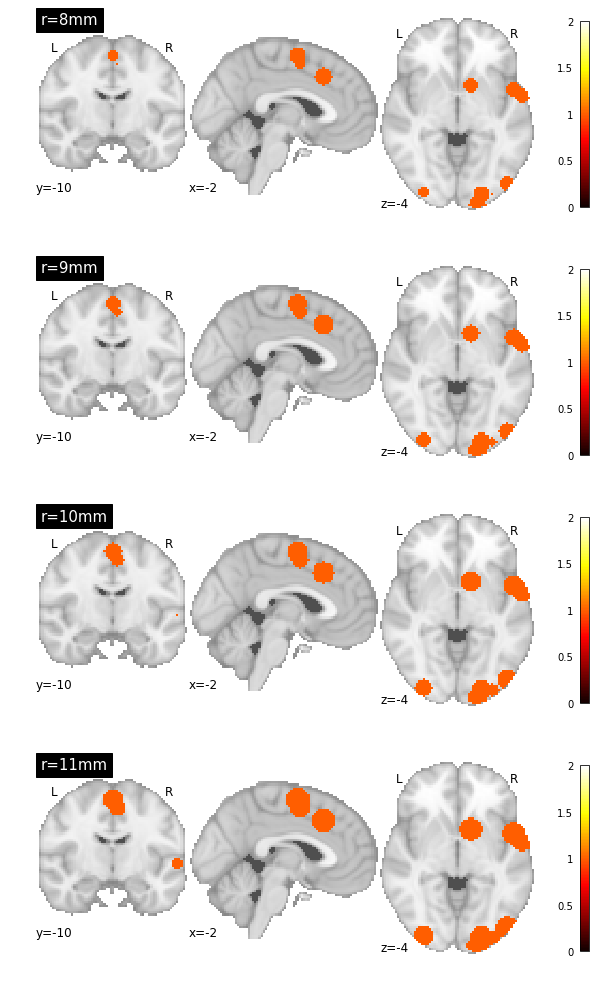

In [2]:
database_file = join(dirname(nimare.__file__), 'tests/data/nidm_pain_dset.json')
db = nimare.dataset.Database(database_file)
ds = db.get_dataset()

kernel = nimare.meta.cbma.MKDAKernel(ds.coordinates, ds.mask)
mkda_r08 = kernel.transform(ids=ds.ids, r=8)
mkda_r09 = kernel.transform(ids=ds.ids, r=9)
mkda_r10 = kernel.transform(ids=ds.ids, r=10)
mkda_r11 = kernel.transform(ids=ds.ids, r=11)

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 17.5))
plot_stat_map(mkda_r08[2], cut_coords=[-2, -10, -4],
              title='r=8mm', vmax=2, axes=axes[0],
              draw_cross=False)
plot_stat_map(mkda_r09[2], cut_coords=[-2, -10, -4],
              title='r=9mm', vmax=2, axes=axes[1],
              draw_cross=False)
plot_stat_map(mkda_r10[2], cut_coords=[-2, -10, -4],
              title='r=10mm', vmax=2, axes=axes[2],
              draw_cross=False)
plot_stat_map(mkda_r11[2], cut_coords=[-2, -10, -4],
              title='r=11mm', vmax=2, axes=axes[3],
              draw_cross=False)
fig.savefig('mkda_ma_maps.png', dpi=400)

In [3]:
%%time
kernel = nimare.meta.cbma.MKDAKernel(ds.coordinates, ds.mask)
mkda_res = kernel.transform(ids=ds.ids, r=10)

CPU times: user 240 ms, sys: 80 ms, total: 320 ms
Wall time: 321 ms


In [4]:
%%time
kernel = nimare.meta.cbma.KDAKernel(ds.coordinates, ds.mask)
kda_res = kernel.transform(ids=ds.ids, r=10)

CPU times: user 268 ms, sys: 68 ms, total: 337 ms
Wall time: 336 ms


In [5]:
%%time
kernel = nimare.meta.cbma.ALEKernel(ds.coordinates, ds.mask)
ale_res = kernel.transform(ids=ds.ids, n=20)

CPU times: user 165 ms, sys: 64.1 ms, total: 229 ms
Wall time: 228 ms


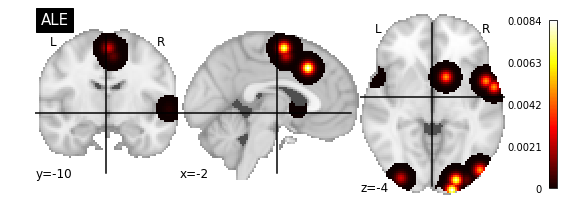

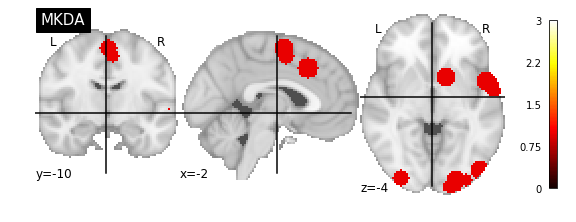

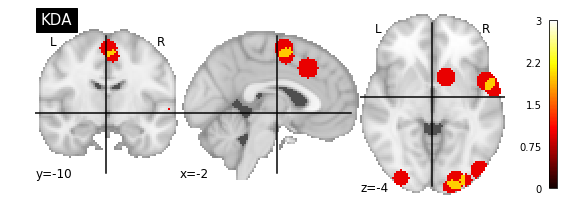

In [6]:
max_conv = np.max(kda_res[2].get_data())
plot_stat_map(ale_res[2], cut_coords=[-2, -10, -4], title='ALE')
plot_stat_map(mkda_res[2], cut_coords=[-2, -10, -4], title='MKDA', vmax=max_conv)
plot_stat_map(kda_res[2], cut_coords=[-2, -10, -4], title='KDA', vmax=max_conv)